**Daniel Yu**

CS 251/2: Data Analysis and Visualization

Spring 2024

### Reminder: AI Policy

To improve the quality of your learning and out of fairness to your hardworking classmates, AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions. This includes both written analysis, plotting, and code. I will only grade your work, not an AI's. I will stop grading your project if I notice AI-generated content (in any capacity).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Project 6 | Supervised Learning

## Task 1: K Nearest Neighbors (KNN) Classifier

To start off the project, you will implement the **KNN classifier**, a bedrock, highly-versatile, nonparametric (i.e. *memory-based*) supervised learning algorithm. You will test out and experiment with KNN on a **multi-class spiral 2D dataset**.

### 1a. Load and visualize spiral data

1. Below, load in both spiral datasets 1 (`spiral_train_1.csv`, `spiral_val_1.csv`) and 2 (`spiral_train_2.csv`, `spiral_val_2.csv`). Each training set has 4,000 samples and each validation set has 1,200 samples (*there is no test set for this development dataset*).
2. Create a 2x2 grid plot showing the train and validation data side-by-side in each version of the dataset.
    - Be sure to label your subplots with informative titles (which dataset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).
3. Convert your datasets from pandas to ndarray format.
4. For this dataset, the labels are a column in the CSV files. Before moving on, create separate arrays to store the training and validation labels. Remove the labels from your train and test dataset arrays (i.e. they should be `(N, 2)`).

#### Format of spiral data

- Column 1: x coordinate of a 2D point (on a spiral).
- Column 2: y coordinate of a 2D point (on a spiral).
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1, 2, 3]

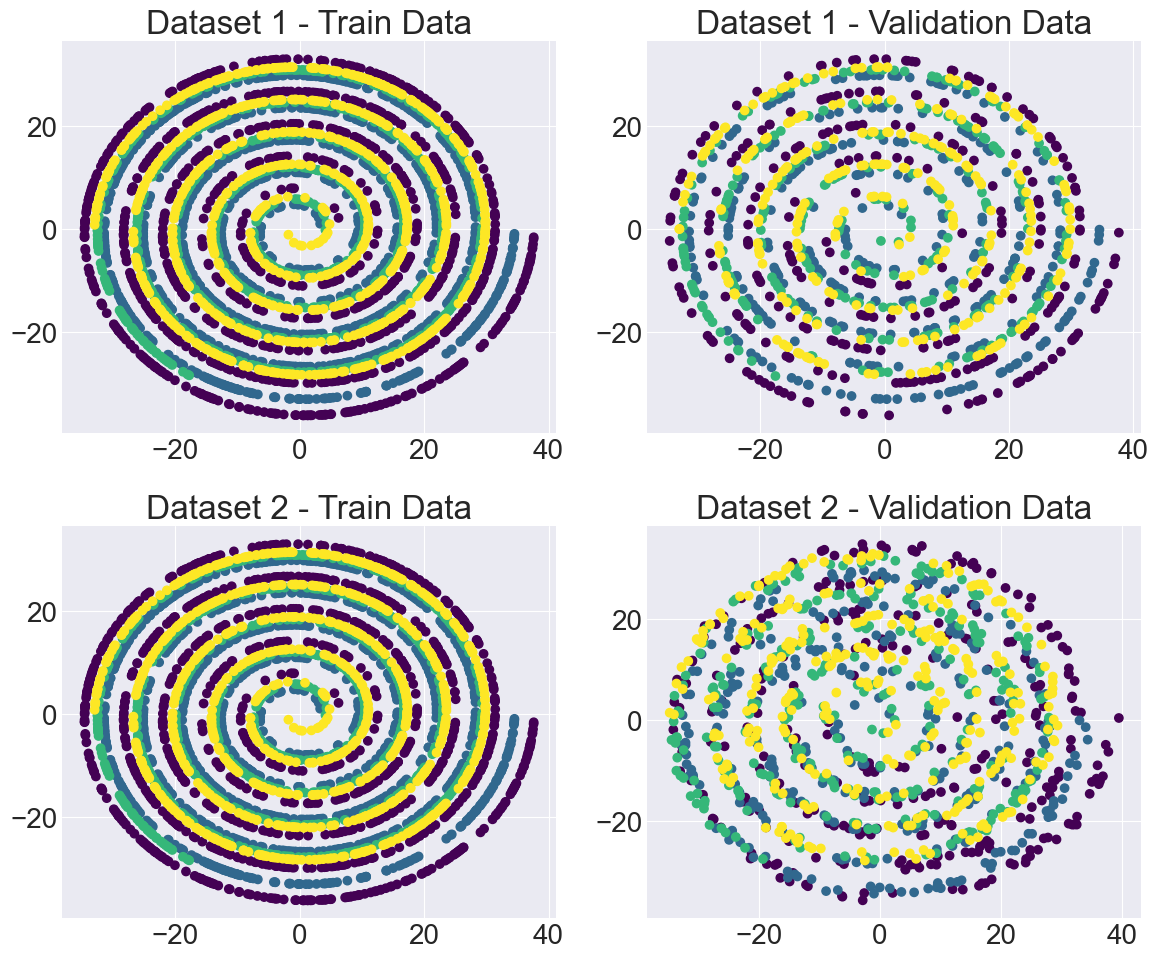

Spiral 1 train (4000, 2), classes (4000,)
Spiral 1 validation (1200, 2), classes (1200,)
Spiral 2 train (4000, 2), classes (4000,)
Spiral 2 validation (1200, 2), classes (1200,)

Spiral 1 train data in ndarray format? True
Spiral 1 train class in ndarray format? True
Spiral 1 validation data in ndarray format? True
Spiral 1 validation class in ndarray format? True
Spiral 2 train data in ndarray format? True
Spiral 2 train class in ndarray format? True
Spiral 2 validation data in ndarray format? True
Spiral 2 validation class in ndarray format? True


In [13]:
spiral_1_t = pd.read_csv('data/spiral_train_1.csv')
spiral_1_v = pd.read_csv('data/spiral_val_1.csv')
spiral_2_t = pd.read_csv('data/spiral_train_2.csv')
spiral_2_v = pd.read_csv('data/spiral_val_2.csv')

spiral_1_train = spiral_1_t.iloc[:, :2].values
spiral_1_val = spiral_1_v.iloc[:, :2].values
spiral_2_train = spiral_2_t.iloc[:, :2].values
spiral_2_val = spiral_2_v.iloc[:, :2].values

spiral_1_train_y = spiral_1_t.iloc[:, 2].values
spiral_1_val_y = spiral_1_v.iloc[:, 2].values
spiral_2_train_y = spiral_2_t.iloc[:, 2].values
spiral_2_val_y = spiral_2_v.iloc[:, 2].values

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(spiral_1_train[:, 0], spiral_1_train[:, 1], c=spiral_1_train_y, cmap='viridis')
axs[0, 0].set_title('Dataset 1 - Train Data')
axs[0, 1].scatter(spiral_1_val[:, 0], spiral_1_val[:, 1], c=spiral_1_val_y, cmap='viridis')
axs[0, 1].set_title('Dataset 1 - Validation Data')

axs[1, 0].scatter(spiral_2_train[:, 0], spiral_2_train[:, 1], c=spiral_2_train_y, cmap='viridis')
axs[1, 0].set_title('Dataset 2 - Train Data')
axs[1, 1].scatter(spiral_2_val[:, 0], spiral_2_val[:, 1], c=spiral_2_val_y, cmap='viridis')
axs[1, 1].set_title('Dataset 2 - Validation Data')

plt.tight_layout()
plt.show()

print(f'Spiral 1 train {spiral_1_train.shape}, classes {spiral_1_train_y.shape}')
print(f'Spiral 1 validation {spiral_1_val.shape}, classes {spiral_1_val_y.shape}')
print(f'Spiral 2 train {spiral_2_train.shape}, classes {spiral_2_train_y.shape}')
print(f'Spiral 2 validation {spiral_2_val.shape}, classes {spiral_2_val_y.shape}')
print()

print(f'Spiral 1 train data in ndarray format? {isinstance(spiral_1_train, np.ndarray)}')
print(f'Spiral 1 train class in ndarray format? {isinstance(spiral_1_train_y, np.ndarray)}')
print(f'Spiral 1 validation data in ndarray format? {isinstance(spiral_1_val, np.ndarray)}')
print(f'Spiral 1 validation class in ndarray format? {isinstance(spiral_1_val_y, np.ndarray)}')
print(f'Spiral 2 train data in ndarray format? {isinstance(spiral_2_train, np.ndarray)}')
print(f'Spiral 2 train class in ndarray format? {isinstance(spiral_2_train_y, np.ndarray)}')
print(f'Spiral 2 validation data in ndarray format? {isinstance(spiral_2_val, np.ndarray)}')
print(f'Spiral 2 validation class in ndarray format? {isinstance(spiral_2_val_y, np.ndarray)}')

### 1b. Implement KNN


Implement the following methods of `Classifier` in `classifier.py`, which will be the parent class to the `KNN` classifier.
- Constructor
- `accuracy(y, y_pred)`: Compute percent correct given true data class labels `y` and algorithm predicted class labels `y_pred`. 

Implement the following methods of `KNN` in `knn.py`. 
- Constructor
- `train(data, y)`: Train the KNN classifier on the data `data`, where training samples have corresponding class labels in `y`.
- `predict(data, k)`: Use the trained KNN classifier to predict the class label of each test sample in `data`. Determine class by voting: find the closest `k` training exemplars (training samples) and the class is the majority vote of the classes of these training exemplars.

Test relevant methods using the test code below.

In [38]:
from knn import KNN

#### Test: Accuracy

In [26]:
np.random.seed(0)
test_y = np.random.randint(low=0, high=11, size=(50,))
test_y_pred = np.random.randint(low=0, high=11, size=(50,))

classifier = KNN(num_classes=0)
acc = classifier.accuracy(test_y, test_y_pred)
print(f'Test accuracy is {acc} and should be 0.06.')

Test accuracy is 0.06 and should be 0.06.


#### Test: 1-NN

In [27]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 1
spiral_1_y_pred = classifier.predict(spiral_1_train, k)
acc = classifier.accuracy(y=spiral_1_train_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=1 is {acc} and should be 1.0')

Your accuracy with K=1 is 1.0 and should be 1.0


#### Test 2-NN

*Note: The below test code assumes that you resolve voting ties with the class that has a lower index. There is a numpy function that you may feel inclined to use (or not!) that handles this automatically.*

In [28]:
n_classes = 4
classifier = KNN(num_classes=n_classes)
classifier.train(spiral_1_train, spiral_1_train_y)

k = 2
spiral_1_y_pred = classifier.predict(spiral_1_val, k)
acc = classifier.accuracy(y=spiral_1_val_y, y_pred=spiral_1_y_pred)
print(f'Your accuracy with K=2 is {acc:.2f} and should be 0.88')

true_test_y = np.array([2., 2., 2., 2., 2., 3., 2., 2., 3., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 3., 3., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 3., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 3., 2., 2., 2., 3., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

print(f'The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are\n{np.where(true_test_y != spiral_1_y_pred[750:900], 1, 0)}')
print('Seeing all 0s means everything seems to be working great!')

Your accuracy with K=2 is 0.88 and should be 0.88
The mismatches between your predicted class of validation samples with indices 750-900 and the expected values are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Seeing all 0s means everything seems to be working great!


### 1c. Questions

**Question 1:** Explain why in the above 1-NN test, the accuracy must be 100%.

**Answer 1:** We use the train data both for training and predictions. Training the data using spiral_1_train, the exemplars are set in place. Now running the predict method on the same dataset and having one nearest neighbor, the closest exemplar to the test sample is the original data point which gives a distance of 0. From this, the data will always predict the class of the original dataset, resulting in an accuracy of 100. With k=1, the algorithm selects the closest point in the training set to each point in the training set itself. Since each point in the training set is itself, the predicted label will always match the true label.

### 1d. Find the best `k`

- Below, "script" your `predict` method on both spiral datasets 1 and 2. Compute the accuracy on the respective test sets with many different values of `k`.
- Create two well-labeled plots, one for each spiral dataset, showing the accuracy for many different `k` values.

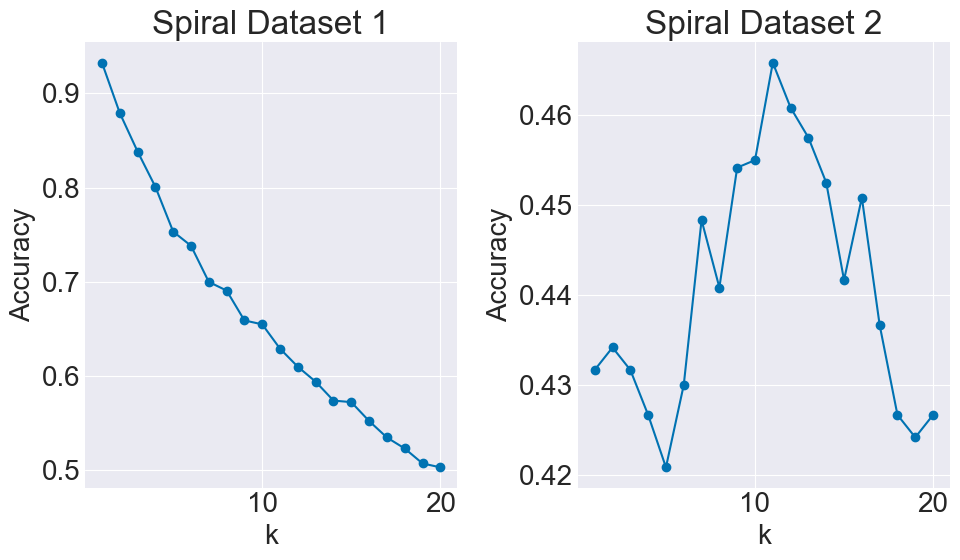

In [29]:
accuracies_1 = []
accuracies_2 = []

k_values = range(1, 21)

for k in k_values:
    classifier_1 = KNN(num_classes=4)
    classifier_2 = KNN(num_classes=4)
    classifier_1.train(spiral_1_train, spiral_1_train_y)
    classifier_2.train(spiral_2_train, spiral_2_train_y)
    y_pred_val_1 = classifier_1.predict(spiral_1_val, k)
    y_pred_val_2 = classifier_2.predict(spiral_2_val, k)
    accuracy_val_1 = classifier_1.accuracy(spiral_1_val_y, y_pred_val_1)
    accuracy_val_2 = classifier_2.accuracy(spiral_2_val_y, y_pred_val_2)
    accuracies_1.append(accuracy_val_1)
    accuracies_2.append(accuracy_val_2)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_1, marker='o')
plt.title('Spiral Dataset 1')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(k_values, accuracies_2, marker='o')
plt.title('Spiral Dataset 2')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

### 1e. Questions

**Question 2:** What is the `k` that results in the highest accuracy on each spiral dataset?

**Question 3:** Why are the accuracies are so different across the datasets? (*Hint: look at the data*)

**Question 4:** Why are the best `k` values are so different across the datasets?

**Question 5:** Is it a good idea to always set `k` to one of these values when working with another dataset?

**Answer 2:** The k that results in the highest accuracy for spiral dataset 1 is when k = 1, as the accuracy diminishes as k increases as shown from the plots. For spiral dataset 2, when k is equal to 11, it results in the highest accuracy as shown with the pinnacle of the graph 

**Answer 3:** Dataset 2's validation set is way different than the train data. In fact, its more scrambled while dataset 1's validation set seems to perfectly align with some of the points. For instance, the first sample for spiral val 1 is -8.41 and -28.34, while for spiral val 2 it is -6.59 and -27.99.

**Answer 4:** The best k values are so different across the datasets could depend on the classes. Since when classes are well separated, a smaller k would demonstrate the data more accurate. However, when classes overlapped and noise is bigger (demonstrated by the spiral dataset 2 plot), a larger k is more appropriate.

**Answer 5:** Not really, we don't know anything about the distribution of other datasets, and the optimal k value depends on the specific characteristics of the dataset. Instead, we should just do the testing as we did with these 2.

### 1f. Visualize class boundaries

- Implement `plot_predictions` in `knn.py` to visualize how different regions of the (2D) dataspace would be classified. In this visualization, use four discrete colors to represent each of the classes. For example, if KNN would classify (x, y) = (10, 10) to spiral 2, you would color that region blue (for example). You will repeat this for lots of different regularly spaced x,y points to get a better picture of the regions that would be predicted to belong to different classes.
- For spiral dataset 1 and 2, plot the class boundaries for the k best value determined above.

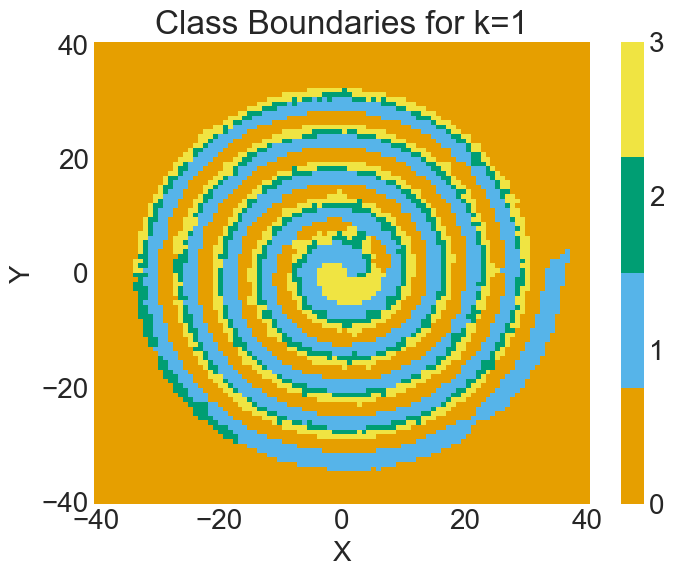

In [58]:
# Visualize KNN boundary 1
classifier_1 = KNN(num_classes=4)
classifier_1.train(spiral_1_train, spiral_1_train_y)
classifier_1.plot_predictions(1, 100)

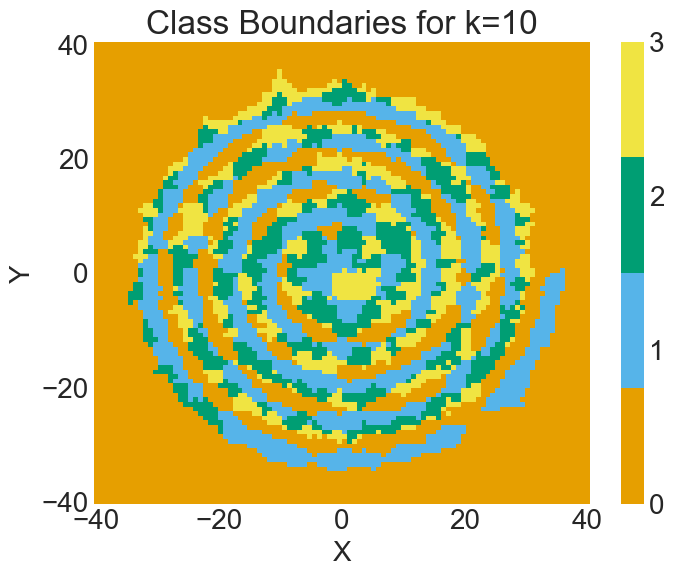

In [59]:
# Visualize KNN boundary 2
classifier_2 = KNN(num_classes=4)
classifier_2.train(spiral_2_train, spiral_2_train_y)
classifier_2.plot_predictions(10, 100)

### 1g. Questions

**Question 6:** Why could visualizing the class boundaries be useful?

**Answer 6:**  Visualizing the class boundaries allows us to visually inspect how well the model is able to separate different classes. We can see for example the background we would know that how things would be classified even though we don't actually have any datapoints so show it. We can also look for specific patterns.